# Image Classification using (Shallow) Machine Learning Techniques

Image classification and machine learning around images is almost always delegated to deep machine learning algorithms such as TensorFlow, MXNet or Keras.

However, machine learning algorithms can also be used to help answer image classification and other questions as well.  Having an understanding around how to apply machine learning algorithms to common problems will be an increasingly important skill to have.

**Adrian Rosebrock** - Entrepreneur and Ph.D in Computer Vision, Machine Learning and Information Retrieval.  
[PyImageSearch](https://www.pyimagesearch.com/start-here-learn-computer-vision-opencv/)

---

Addressing the question, "Why learn Deep Learning?"

<font size="3"><i>
"And perhaps most importantly, in the near future, a computer scientist [Software Engineer] without at least some knowledge of AI [Artificial Intelligence], DL [Deep Learning, Machine Learning], CV [Computer Vision] will be like an engineer without basic programming skills — <b>potentially unemployable and overlooked for new job opportunities, research grants, and projects.</b>"
    </i>    </font>
    
    
This notebook was inspired by Adrians Blog post: **pyimagesearch.com**

[Machine Learning in Python](https://www.pyimagesearch.com/2019/01/14/machine-learning-in-python/)

I highly recommend his blogs and tutorials.  They are well written and maintained.

### Book recommendations

#### Practical Python and OpenCV

[https://www.pyimagesearch.com/practical-python-opencv/](https://www.pyimagesearch.com/practical-python-opencv/)

<img src="notebook_images/practical_python_and_opencv_cover_green_4th_ed.png" alt="OpenCVBOok" style="width: 150px;"/>


#### Introduction to Machine Learning with Python: A Guide for Data Scientists
- Book by Andreas Muller and Sarah Guido is a very consumeable guide to machine learning with great insight into the field.

<img src="notebook_images/ml_book_cover.jpg" alt="MLBOok" style="width: 150px;"/>


- You can find that on [Amazon](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413/ref=sr_1_2?ie=UTF8&qid=1511371961&sr=8-2&keywords=machine+learning+oreilly).

- Andreas [GitHub](https://github.com/amueller/introduction_to_ml_with_python) material for the book.



Where can you find the notebook?

<font size="4">https://github.com/youngsoul/pyimagesearch-python-machine-learning</font>


# Overview

This notebook will focus on the the shallow machine learning techniques.  Another notebook will take the same input data and describe how to apply deep learning techniques.




The goals of this notebook are:

- Gentle introduction to Computer Vision and image processing

- How to look for features in data that are perhaps un-obvious at first

- How to use OpenCV to create a feature set

- Present a high level overview of a number of Scikit-Learn Machine Learning models

- Demonstrate the steps to creating a Machine Learning model

- Demonstrate how to predict using a Machine Learning Model

- Setup the next discussion on Deep Learning and Image Classification.

This is a lot of material, in a short time.  It is ok if it all does not make sense at first.  I want to introduce topics at the code level with supporting books and blogs for you to investigate further.

Understanding Machine Learning is a marathon and the best way to learn it, is to just start.

**Problem are we trying to solve:  Image Classification**

Extract the image features so that we can train a supervised machine learning model to predict one of 3 different categories for the image.



# Local Machine Setup

These instructions are somewhat high level, meaning you might have to look up how to install certain software for you particular machine - but the steps are correct.

Because this is a notebook about Computer Vision, one of the most common computer vision libraries is *OpenCV*.  You will have to install OpenCV on your machines.

## Python 3.6.x

While Python 3.7.x is out, this notebook has only been tested with 3.6.x.  Tensorflow, for example, last I checked did not work with 3.7.x yet. 

## OpenCV 4.x

At the time of this writing, OpenCV 4.0.1 is released with 4.1.0 on the way.  You can find more information at:
[https://docs.opencv.org/4.0.1/](https://docs.opencv.org/4.0.1/).

It is recommended that you install the latest version for your computer.

## Python Libraries

```python
pip install numpy
pip install sklearn
pip install pandas
pip install matplotlib
pip install jupyter
```

# Image Processing Overview

This section is meant to be short, and direct to lay a foundation of the components of an image

### Image

An image is made up of a collection of pixels.  The pixel is the most fundemental building block of an image and there is no finer granularity.

A 2D image is thought of as a grid or matrix of X,Y values.  The upper left corner is considered 0,0 and the X value increase from left to right and the Y value increases from top to bottom.

For example a 500 x 300 pixel image has 500 rows and 300 columns for a total number of pixels = 500 * 300 = 150,000.

#### Grayscale and Color
Pixels are either a single value for grayscale or a tuple of 3 values for Red, Green Blue.  Each pixel intensity ranges in value from 0, black to 255 or white.

<font size="4">Assuming a color channel in the order:  Red, Green Blue</font>

color tuple is made up of:  (red, green, blue)

A white pixel is a tuple of, (255,255,255).  A red pixel is a tuple of (255, 0, 0 )

The reason we stress the color channel order is because OpenCV stores the color change as Blue, Green, Red.  It is just how they do it and you just have to know it and work with it.  There are conversion routines built into OpenCV.

<img src="notebook_images/letter_I.png" alt="LetterI" style="width: 300px;"/>


#### Histogram

A histogram represents the distribution of pixel intensities (either grayscale or color) in an image.

<img src="notebook_images/histogram.png" alt="Histo" style="width: 400px;"/>





# OpenCV

Lets explore some of the operations and capabilitiles of OpenCV.  It is a very capable and powerful image library and we are just going to look at the minimum of features needed for this notebook. 


In [52]:
from matplotlib import pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [53]:
print(cv2.__version__)

4.0.1


### Read and Show an Image

In [ ]:
def show_grayscale(img_path, name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(6,8))
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.show()
    
def show_rgb(img_path, name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(name)
    plt.show()


def show_bgr(img_path, name):
    img = cv2.imread(img_path)

    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(name)
    plt.show()

    

In [54]:
forest_image_path = 'test_images/forest_nat147.jpg'
highway_image_path = 'test_images/highway_urb716.jpg'


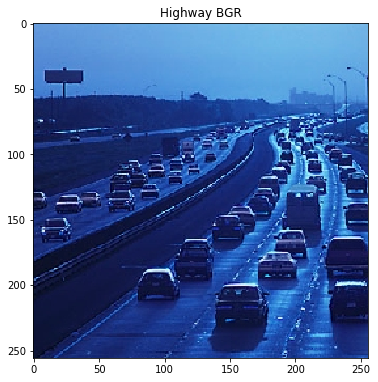

In [55]:
show_bgr(highway_image_path, 'Highway BGR')

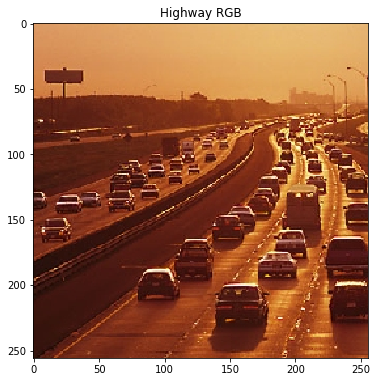

In [56]:
show_rgb(highway_image_path, 'Highway RGB')

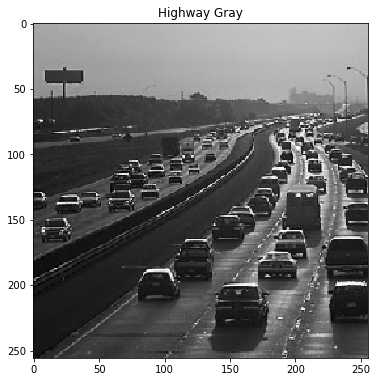

In [57]:
show_grayscale(highway_image_path, 'Highway Gray')

### Split Image into Red, Green and Blue channels

We would like to do this so that we can separate the colors channels so that we can operate on each channel differently.

Use **OpenCV** *split* method to split the image into 3 numpy arrays.

Using numpy we can operate on the arrays efficiently.

Function Name	Description
- np.sum	Compute sum of elements

- np.mean	Compute mean of elements

- np.std	Compute standard deviation

- np.var	Compute variance

- np.min	Find minimum value

- np.max	Find maximum value


In [58]:
# RECALL: OpenCV returns the image in Blue, Green, Red order NOT Red,Green,Blue
highway_image = cv2.imread(highway_image_path)
(B,G,R) = cv2.split(highway_image)

In [59]:
type(B)

numpy.ndarray

In [60]:
(R.mean(), G.mean(), B.mean())

(144.9398651123047, 78.62977600097656, 43.884429931640625)

In [61]:
(R.std(), G.std(), B.std())

(61.179201649610945, 58.56715675885695, 37.55190228847438)

In [62]:
(R.var(), G.var(), B.var())

(3742.8947144837584, 3430.1118508165237, 1410.1453654831275)

In [63]:
(R.min(), G.min(), B.min())

(27, 0, 0)

In [64]:
(R.max(), G.max(),B.max())

(255, 255, 237)

### Histogram

OpenCV calcHist method:


```calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```



In [ ]:
import matplotlib.gridspec as gridspec
import numpy as np

def plot_rgb_histogram(img_path, setup_figure=True):
    image = cv2.imread(img_path)
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    if setup_figure:
        plt.figure(figsize=(6,8))
    plt.title("Color Histogram")
    plt.xlabel("pixel intensities")
    plt.ylabel("# of Pixels")
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])   
        
        

def get_normalized_image_histogram(img_path, mask=None):
    image = cv2.imread(img_path)

    hist = cv2.calcHist([image], [0, 1, 2],
                        mask, [8,8,8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)

    # return as a feature vector
    # the shape of the returned histogram is
    # 8*8*8 = 512 x 1 
    return hist.flatten()
    
def plot_binned_histogram(img_path, setup_figure=True):
    bin_data = get_normalized_image_histogram(img_path)
    if setup_figure:
        plt.figure(figsize=(6,8))
    plt.title("Flattened Binned Color Histogram")
    plt.xlabel("Pixel Bins")
    plt.ylabel("Normalized ")
    plt.plot(bin_data, color = 'b')
    plt.xlim([0, 512])   
    
def image_summaries(img_paths, img_names, figsize=(20,10)):
    rows = len(img_paths)
    cols = 3
    cell = 1
    plt.figure(figsize=figsize)
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
    for i, img_path in enumerate(img_paths):
        plt.subplot(rows, cols, cell)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(img_names[i])

        cell = cell +1        
        plt.subplot(rows, cols, cell)
        plot_rgb_histogram(img_path, False)
        cell = cell + 1
        plt.subplot(rows, cols, cell )
        plot_binned_histogram(img_path, False)
        cell = cell + 1

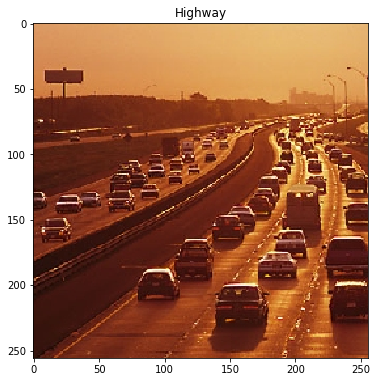

In [65]:
show_rgb(highway_image_path, 'Highway')

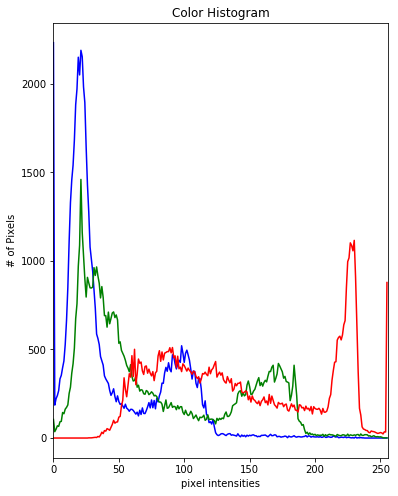

In [66]:
plot_rgb_histogram(highway_image_path)

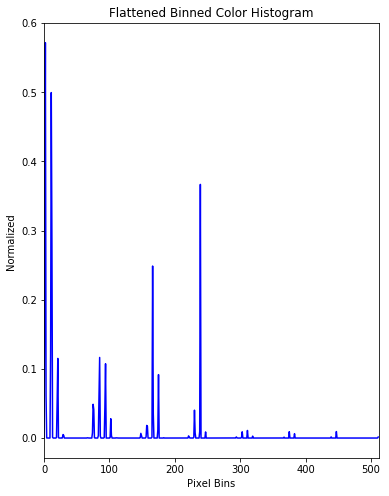

In [67]:
plot_binned_histogram(highway_image_path)

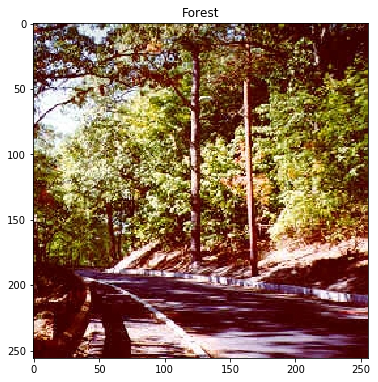

In [68]:
show_rgb(forest_image_path, 'Forest')

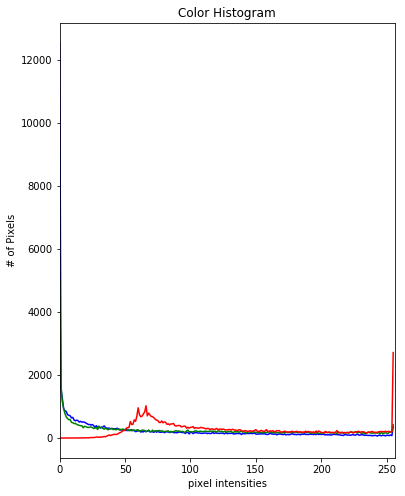

In [69]:
plot_rgb_histogram(forest_image_path)

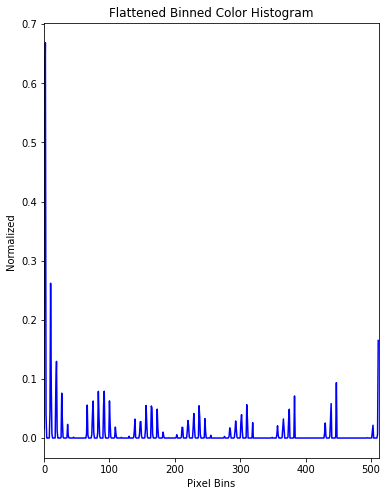

In [70]:
plot_binned_histogram(forest_image_path)

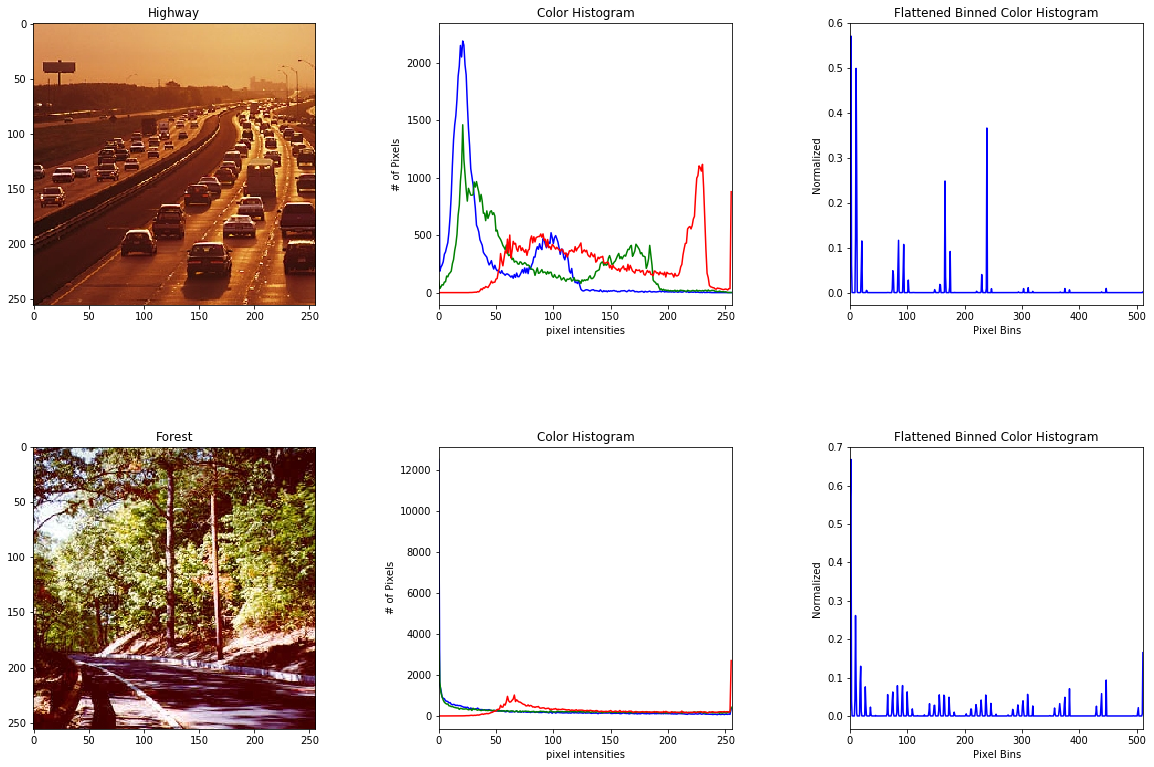

In [71]:
image_summaries([highway_image_path, forest_image_path], ['Highway', 'Forest'])

At this point the features that we are going to extract from images to train a machine learing model are:

* Mean red, green and blue pixel intensities of a picture

* Standard deviation of read, green and blue pixel intensities of a picture

* the binned histogram of the color distribution for red, green and blue pixels

# 3Scenes Data Set

The data set is a 3 Scenes data set.

<table><tr><td>Coast</td><td>Highway</td><td>Forest</td></tr><tr>
<td> <img src="./notebook_images/coast_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/highway_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/forest_collage.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

We are going to extract features and train a number of models to determine the best model for the feature set.

In [72]:
image_dir = '3scenes'

# Features and Labels

### Features

The features used for this image classification will be:

- Mean Red

- Mean Green

- Mean Blue

- Standard Deviation Red

- Standard Deviation Blue

- Standard Deviation Green

- Image Histogram of 512 Values (8 * 8 * 8) bins

In [ ]:
# %load rgbhistogram.py
import cv2
import numpy as np

"""
This histogram will be used to charac- terize the color of the flower petals, 
which is a good starting point for classifying the species of a flower
"""


class RGBHistogram:

    def __init__(self, bins):
        self.bins = bins

    def get_features(self, imagePath):
        img = cv2.imread(imagePath)
        features = []
        if img is not None:
            features.extend(self.extract_color_stats(img))
            features.extend(self.describe(img).tolist())

        return features

    def extract_color_stats(self, image):
        # split the input image into its respective RGB color channels
        # and then create a feature vector with 6 values: the mean and
        # standard deviation for each of the 3 channels, respectively
        (B,G, R) = cv2.split(image)
        stats = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
                    np.std(G), np.std(B)]

        # perform a min/max scaling on the mean and standard deviation since we are
        # normalizing the histogram bins as well.
        np_stats = np.array(stats)
        normal_np_stats = np.interp(np_stats, (np_stats.min(), np_stats.max()), (0, +1))

        # return our set of features
        return normal_np_stats

    def describe(self, image, mask=None):
        hist = cv2.calcHist([image], [0, 1, 2],
                            mask, self.bins, [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)

        # return as a feature vector
        return hist.flatten()



### Labels

Labels, meaning whether the image is a Cat, Dog, or Panda or Coast, Highway or Forest is derived from the directory structure.

### Load Image Features

In [73]:
from path_utils import list_images
from rgbhistogram import RGBHistogram
import os
import pandas as pd


def load_image_features(root_image_dir):
    imagePaths = list_images(root_image_dir)
    features = []
    image_labels = []

    rgbHisto = RGBHistogram([8, 8, 8])

    # loop over our input images
    for imagePath in imagePaths:
        cv2_features = rgbHisto.get_features(imagePath)
        features.append(cv2_features)

        # extract the class label from the file path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        image_labels.append(label)
        
    return features, image_labels


In [74]:
# recall image directory is:  3scenes
features, image_labels = load_image_features(image_dir)

In [75]:
features_df = pd.DataFrame(features)

In [76]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.583764,0.691128,1.000000,0.037851,0.000000,0.115431,0.735941,0.006800,0.003057,0.002214,...,0.000738,0.005482,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.276360
1,0.534863,0.711045,1.000000,0.000000,0.028268,0.160073,0.028533,0.000000,0.000000,0.000000,...,0.000279,0.000056,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000056,0.000502
2,0.762259,0.822812,1.000000,0.116937,0.000000,0.212200,0.001442,0.000832,0.000000,0.000000,...,0.000665,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000333
3,0.960754,0.962484,1.000000,0.010851,0.000000,0.039311,0.000000,0.000000,0.000000,0.000000,...,0.163465,0.037745,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.001053,0.852437
4,0.323226,1.000000,0.965782,0.033635,0.000000,0.075070,0.102901,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.118592,0.342092,0.25552,0.100347,0.000821


The data set is a 3 Scenes data set.

<table><tr><td>Coast</td><td>Highway</td><td>Forest</td></tr><tr>
<td> <img src="./notebook_images/coast_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/highway_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/forest_collage.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

We are going to extract features and train a number of models to determine the best model for the feature set.

In [77]:
labels_df = pd.DataFrame(image_labels)

In [78]:
labels_df.loc[::400]

,0
0,coast
400,forest
800,highway


## Convert String Labels to Numeric Labels

Machine learning algorithms generally have to work with numeric values.  Therefore we have to convert the labels of strings, 'cats', 'dogs', 'panda' to numbers.

This is what the *LabelEncoder* will do.


In [79]:
from sklearn.preprocessing import LabelEncoder
from more_itertools import unique_everseen

le = LabelEncoder()
labels = le.fit_transform(image_labels)

# return the list of unique classes/targets/labels
label_classes =  le.classes_
print(label_classes)
with open(f'./{image_dir}_scene_labels.txt', 'w') as f:
    for i, y in enumerate(label_classes):
        print(f"{i},{y}")
        f.write(f"{i},{y}")
        f.write("\n")


['coast' 'forest' 'highway']
0,coast
1,forest
2,highway


In [80]:
labels_df = pd.DataFrame(labels)
labels_df.loc[::400]

,0
0,0
400,1
800,2


In [81]:
X = features_df
y = labels

# Model Selection and Training

Using the Features 'X' and labels 'y', train a number of models and select the best one to use for the image classification.

Keep in mind that since we are using (Shallow) Machine Learning on color features only - the accuracy will be low.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import os
from rgbhistogram import RGBHistogram
from sklearn.externals import joblib
from operator import itemgetter
from xgboost import XGBClassifier
import pandas as pd


In [83]:
models = {
    "knn":           KNeighborsClassifier(n_neighbors=3),
    "naive_bayes":   GaussianNB(),
    "logit":         LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm":           SVC(kernel="linear"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_leaf=4),
    "mlp2":          MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, alpha=0.0001,
                          solver='adam', verbose=10, tol=0.000000001),
    "mlp":           MLPClassifier(),
    "xgboost":       XGBClassifier(learning_rate=0.01)
}


Using Cross Validation to determine the best model to use based on the data we have to train with.

In [84]:
def cross_validate_model(model_name, X, y):
    # train the model
    # print("[INFO] using '{}' model".format(args["model"]))
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=3)
    accuracy = scores.mean()
    return model_name, accuracy, model


In [85]:
model_name = 'all'

In [86]:
results = []
best_model = None
if model_name == 'all':
    for k, v in models.items():
        results.append(cross_validate_model(k, X, y))
        for r in results:
            print(r)

    results.sort(key=itemgetter(1))
    print(f"Best Model: {results[-1]}")
    best_model = results[-1][2] # 0-model name, 1-accuracy, 2-model
    best_accuracy = results[-1][1]

else:
    model_name, best_accuracy, model = cross_validate_model(model_name, X, y)
    best_model = model
    print(model_name, accuracy)
    saved_model_name = f"{image_dir}_image_classify_scikit_model.sav"
    joblib.dump(model, saved_model_name)
    print(f"Saving model to: {saved_model_name}")



('knn', 0.7485784626029025, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('knn', 0.7485784626029025, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('naive_bayes', 0.6102991052956459, GaussianNB(priors=None, var_smoothing=1e-09))
('knn', 0.7485784626029025, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('naive_bayes', 0.6102991052956459, GaussianNB(priors=None, var_smoothing=1e-09))
('logit', 0.7656248016130802, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
    

Iteration 115, loss = 0.15718017
Iteration 116, loss = 0.15657371
Iteration 117, loss = 0.15417067
Iteration 118, loss = 0.15337346
Iteration 119, loss = 0.15287040
Iteration 120, loss = 0.15219535
Iteration 121, loss = 0.15219258
Iteration 122, loss = 0.15071106
Iteration 123, loss = 0.14865304
Iteration 124, loss = 0.14708329
Iteration 125, loss = 0.14543614
Iteration 126, loss = 0.14410296
Iteration 127, loss = 0.14287034
Iteration 128, loss = 0.14302313
Iteration 129, loss = 0.14119037
Iteration 130, loss = 0.14138169
Iteration 131, loss = 0.14061363
Iteration 132, loss = 0.13826188
Iteration 133, loss = 0.13688576
Iteration 134, loss = 0.13601884
Iteration 135, loss = 0.13517138
Iteration 136, loss = 0.13478048
Iteration 137, loss = 0.13320518
Iteration 138, loss = 0.13258572
Iteration 139, loss = 0.13111440
Iteration 140, loss = 0.13022824
Iteration 141, loss = 0.12965888
Iteration 142, loss = 0.12894474
Iteration 143, loss = 0.12757484
Iteration 144, loss = 0.12649383
Iteration 

Iteration 368, loss = 0.02927749
Iteration 369, loss = 0.02903334
Iteration 370, loss = 0.02835287
Iteration 371, loss = 0.02867017
Iteration 372, loss = 0.02860900
Iteration 373, loss = 0.02808109
Iteration 374, loss = 0.02781822
Iteration 375, loss = 0.02770381
Iteration 376, loss = 0.02752359
Iteration 377, loss = 0.02733021
Iteration 378, loss = 0.02731977
Iteration 379, loss = 0.02712948
Iteration 380, loss = 0.02690802
Iteration 381, loss = 0.02673844
Iteration 382, loss = 0.02656723
Iteration 383, loss = 0.02670731
Iteration 384, loss = 0.02672804
Iteration 385, loss = 0.02639665
Iteration 386, loss = 0.02609314
Iteration 387, loss = 0.02599226
Iteration 388, loss = 0.02584919
Iteration 389, loss = 0.02590007
Iteration 390, loss = 0.02624466
Iteration 391, loss = 0.02629611
Iteration 392, loss = 0.02579596
Iteration 393, loss = 0.02562947
Iteration 394, loss = 0.02578344
Iteration 395, loss = 0.02556130
Iteration 396, loss = 0.02497795
Iteration 397, loss = 0.02462568
Iteration 

/Users/patryan/Development/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 8, loss = 0.83082063
Iteration 9, loss = 0.79453107
Iteration 10, loss = 0.75912107
Iteration 11, loss = 0.72463469
Iteration 12, loss = 0.69044694
Iteration 13, loss = 0.65897659
Iteration 14, loss = 0.62914301
Iteration 15, loss = 0.60309671
Iteration 16, loss = 0.57823072
Iteration 17, loss = 0.55570951
Iteration 18, loss = 0.53756473
Iteration 19, loss = 0.51974799
Iteration 20, loss = 0.50287980
Iteration 21, loss = 0.48723041
Iteration 22, loss = 0.47325281
Iteration 23, loss = 0.46089224
Iteration 24, loss = 0.45028520
Iteration 25, loss = 0.43926275
Iteration 26, loss = 0.42888104
Iteration 27, loss = 0.41988934
Iteration 28, loss = 0.41113029
Iteration 29, loss = 0.40279966
Iteration 30, loss = 0.39491454
Iteration 31, loss = 0.38736742
Iteration 32, loss = 0.38003177
Iteration 33, loss = 0.37400281
Iteration 34, loss = 0.36857952
Iteration 35, loss = 0.36112848
Iteration 36, loss = 0.35503151
Iteration 37, loss = 0.35010070
Iteration 38, loss = 0.34478707
Iteration 

Iteration 262, loss = 0.08375674
Iteration 263, loss = 0.08305978
Iteration 264, loss = 0.08267368
Iteration 265, loss = 0.08238900
Iteration 266, loss = 0.08172146
Iteration 267, loss = 0.08144076
Iteration 268, loss = 0.08101598
Iteration 269, loss = 0.08032914
Iteration 270, loss = 0.07987146
Iteration 271, loss = 0.07989991
Iteration 272, loss = 0.07907545
Iteration 273, loss = 0.07881850
Iteration 274, loss = 0.07891476
Iteration 275, loss = 0.07830428
Iteration 276, loss = 0.07721495
Iteration 277, loss = 0.07831127
Iteration 278, loss = 0.07810082
Iteration 279, loss = 0.07696742
Iteration 280, loss = 0.07608730
Iteration 281, loss = 0.07627606
Iteration 282, loss = 0.07687210
Iteration 283, loss = 0.07558340
Iteration 284, loss = 0.07460095
Iteration 285, loss = 0.07468954
Iteration 286, loss = 0.07361248
Iteration 287, loss = 0.07273577
Iteration 288, loss = 0.07379859
Iteration 289, loss = 0.07501883
Iteration 290, loss = 0.07392835
Iteration 291, loss = 0.07175504
Iteration 

/Users/patryan/Development/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.09199017
Iteration 2, loss = 1.03974666
Iteration 3, loss = 0.99426699
Iteration 4, loss = 0.95015861
Iteration 5, loss = 0.90531729
Iteration 6, loss = 0.86314644
Iteration 7, loss = 0.81872862
Iteration 8, loss = 0.77430064
Iteration 9, loss = 0.72907095
Iteration 10, loss = 0.68514616
Iteration 11, loss = 0.64497154
Iteration 12, loss = 0.60808623
Iteration 13, loss = 0.57450805
Iteration 14, loss = 0.54391465
Iteration 15, loss = 0.51629221
Iteration 16, loss = 0.49227422
Iteration 17, loss = 0.47152983
Iteration 18, loss = 0.45281076
Iteration 19, loss = 0.43659377
Iteration 20, loss = 0.42203911
Iteration 21, loss = 0.40934428
Iteration 22, loss = 0.39836919
Iteration 23, loss = 0.38834602
Iteration 24, loss = 0.37816198
Iteration 25, loss = 0.37032374
Iteration 26, loss = 0.36276481
Iteration 27, loss = 0.35482701
Iteration 28, loss = 0.34778919
Iteration 29, loss = 0.34128762
Iteration 30, loss = 0.33528117
Iteration 31, loss = 0.32903066
Iteration 32, los

Iteration 263, loss = 0.05514299
Iteration 264, loss = 0.05496709
Iteration 265, loss = 0.05463371
Iteration 266, loss = 0.05484679
Iteration 267, loss = 0.05435808
Iteration 268, loss = 0.05393778
Iteration 269, loss = 0.05317960
Iteration 270, loss = 0.05296696
Iteration 271, loss = 0.05300859
Iteration 272, loss = 0.05225523
Iteration 273, loss = 0.05153413
Iteration 274, loss = 0.05154785
Iteration 275, loss = 0.05101796
Iteration 276, loss = 0.05039765
Iteration 277, loss = 0.05011022
Iteration 278, loss = 0.05000793
Iteration 279, loss = 0.04970282
Iteration 280, loss = 0.04898472
Iteration 281, loss = 0.04880567
Iteration 282, loss = 0.04878469
Iteration 283, loss = 0.04831137
Iteration 284, loss = 0.04804233
Iteration 285, loss = 0.04790841
Iteration 286, loss = 0.04735743
Iteration 287, loss = 0.04764515
Iteration 288, loss = 0.04719904
Iteration 289, loss = 0.04670813
Iteration 290, loss = 0.04656000
Iteration 291, loss = 0.04621855
Iteration 292, loss = 0.04597946
Iteration 

/Users/patryan/Development/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/patryan/Development/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/patryan/Development/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/patryan/Development/mygithub/pyimagesearch

('knn', 0.7485784626029025, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('naive_bayes', 0.6102991052956459, GaussianNB(priors=None, var_smoothing=1e-09))
('logit', 0.7656248016130802, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))
('svm', 0.7879858011926957, SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))
('decision_tree', 0.7454652337413168, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_node

In [87]:
for model_result in results:
    print(f"{model_result[0]}\t {model_result[1]}")


naive_bayes	 0.6102991052956459
decision_tree	 0.7454652337413168
knn	 0.7485784626029025
logit	 0.7656248016130802
mlp2	 0.779432096407738
svm	 0.7879858011926957
mlp	 0.7922558921241284
xgboost	 0.7955290045372664
random_forest	 0.8093292987195229


In [88]:
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Model: {best_model}")

Best Accuracy: 0.8093292987195229
Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Use the best model to fit ( Train the model on the data ) the model so it will be ready to make predictions.

In [89]:
best_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Select the best model based on Accuracy to use for the model execution.

Keep in mind that we use *train_test_split* which takes one random select of data. If we ran, *cross_val_score*, this would be better representation of the model performance.

Save the model to the file system.  This model can then be loaded and used to make predictions

In [90]:
from sklearn.externals import joblib
joblib.dump(best_model, "best_image_classification_model.mdl")


['best_image_classification_model.mdl']

Read the model from the file system and use it to make new predictions

In [91]:
best_model = joblib.load('best_image_classification_model.mdl')

# Model Execution

In [92]:
rgbHisto = RGBHistogram([8, 8, 8])

In [93]:
if image_dir == '3scenes':
    test_images = [
            './3scenes_holdout/forest/forest_for15.jpg',
            './3scenes_holdout/forest/forest_nat982.jpg',
            './3scenes_holdout/coast/coast_cdmc922.jpg',
            './3scenes_holdout/coast/coast_n291061.jpg',
            './3scenes_holdout/highway/highway_art820.jpg',
            './3scenes_holdout/highway/highway_urb537.jpg'
        ]
    test_images_names = [
        'Forest',
        'Forest',
        'Coast',
        'Coast',
        'Highway',
        'Highway'
    ]
    
elif image_dir == 'animals':
    test_images = [
            './animal_holdout/cats/cats_00843.jpg',
            './animal_holdout/cats/cats_00997.jpg',
            './animal_holdout/dogs/dogs_00102.jpg',
            './animal_holdout/dogs/dogs_00163.jpg',
            './animal_holdout/pandas/panda_00050.jpg',
            './animal_holdout/pandas/panda_00755.jpg'
        ]
    test_images_names = [
        'Cat',
        'Cat',
        'Dog',
        'Dog',
        'Panda',
        'Panda'
    ]

else:
    print("Error in specifying training directory")

In [94]:
def predict_image(imagePath, model):
    print(f'Predict for image: {imagePath}')
    features = rgbHisto.get_features(imagePath)
    prediction = model.predict([features])

    print(f'Image: {imagePath}')
    print(f'Prediction: {prediction}')
    print(f'Prediction: {label_classes[prediction[0]]}')
    return label_classes[prediction[0]]


In [95]:
test_image_names_predictions = []
for i, test_image in enumerate(test_images):
    print(f"-----------------------------")
    predicted_label = predict_image(test_image, best_model)
    test_image_names_predictions.append(f'{test_images_names[i]}-{predicted_label}')


-----------------------------
Predict for image: ./3scenes_holdout/forest/forest_for15.jpg
Image: ./3scenes_holdout/forest/forest_for15.jpg
Prediction: [1]
Prediction: forest
-----------------------------
Predict for image: ./3scenes_holdout/forest/forest_nat982.jpg
Image: ./3scenes_holdout/forest/forest_nat982.jpg
Prediction: [1]
Prediction: forest
-----------------------------
Predict for image: ./3scenes_holdout/coast/coast_cdmc922.jpg
Image: ./3scenes_holdout/coast/coast_cdmc922.jpg
Prediction: [0]
Prediction: coast
-----------------------------
Predict for image: ./3scenes_holdout/coast/coast_n291061.jpg
Image: ./3scenes_holdout/coast/coast_n291061.jpg
Prediction: [0]
Prediction: coast
-----------------------------
Predict for image: ./3scenes_holdout/highway/highway_art820.jpg
Image: ./3scenes_holdout/highway/highway_art820.jpg
Prediction: [2]
Prediction: highway
-----------------------------
Predict for image: ./3scenes_holdout/highway/highway_urb537.jpg
Image: ./3scenes_holdout

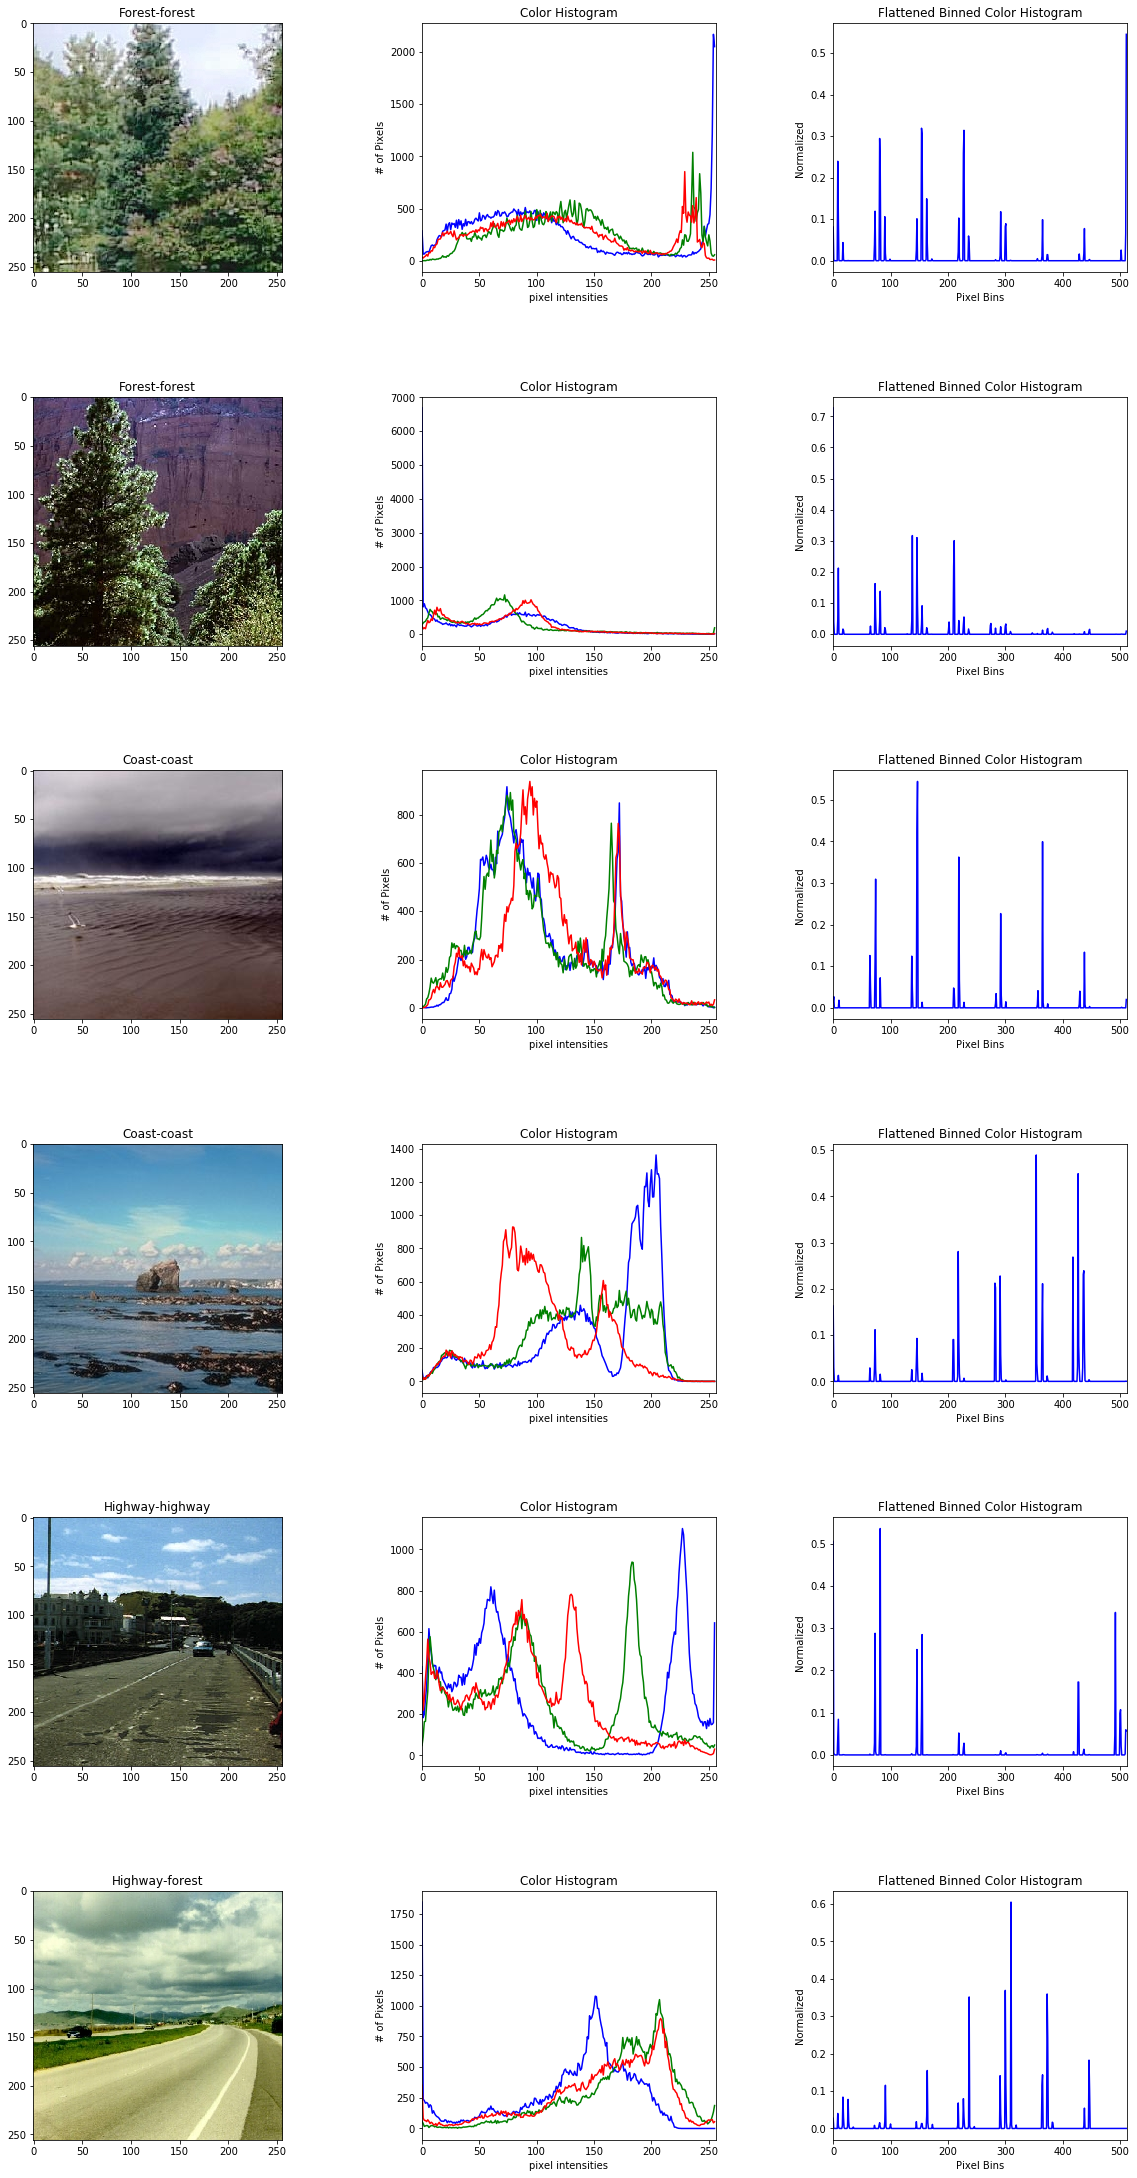

In [96]:
image_summaries(test_images, test_image_names_predictions, (20,30))

## Animals DataSet Summary

Running the same notebook on the image_dir='animals' produced different results.  

As you would expect, the performance is highly depending upon the training data and features we are using to train the models.  For the Cat, Dog, Panda dataset the results were:

```
Best Accuracy: 0.701053463101656
Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
```

And of the 6 animal hold out pictures, it only predicted 50% of those accurately.

This is where we will look at Deep Learning techiques to see if we can improve this

# Summary

The data set is a 3 Scenes data set.

<table><tr><td>Coast</td><td>Highway</td><td>Forest</td></tr><tr>
<td> <img src="./notebook_images/coast_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/highway_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/forest_collage.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

We are going to extract features and train a number of models to determine the best model for the feature set.

In [97]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.583764,0.691128,1.000000,0.037851,0.000000,0.115431,0.735941,0.006800,0.003057,0.002214,...,0.000738,0.005482,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.276360
1,0.534863,0.711045,1.000000,0.000000,0.028268,0.160073,0.028533,0.000000,0.000000,0.000000,...,0.000279,0.000056,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000056,0.000502
2,0.762259,0.822812,1.000000,0.116937,0.000000,0.212200,0.001442,0.000832,0.000000,0.000000,...,0.000665,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000333
3,0.960754,0.962484,1.000000,0.010851,0.000000,0.039311,0.000000,0.000000,0.000000,0.000000,...,0.163465,0.037745,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.001053,0.852437
4,0.323226,1.000000,0.965782,0.033635,0.000000,0.075070,0.102901,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.118592,0.342092,0.25552,0.100347,0.000821


Take a collection of images, tranform into table of numbers to classify images the model has never seen.

This notebook attempted to demonstrate Machine Learning techniques using image classification as the problem.

The goals of this notebook were:

- Gentle introduction to Computer Vision and image processing

- How to look for features in data that are perhaps un-obvious at first

- How to use OpenCV to create a feature set

- Present a high level overview of a number of Scikit-Learn Machine Learning models

- Demonstrate the steps to creating a Machine Learning model

- Demonstrate how to predict using a Machine Learning Model

- Setup the next discussion on Deep Learning and Image Classification.


It was meant to show how to extract features and apply these features to machine learning models.

We saw about an 81% accuracy for this dataset.  This will vary depending upon the dataset, and in general 81% is not thought of as very good for image classification.  However it is likely much better than having to create a more traditional algorithm to perform this task.  

This is because just looking at colors is not a great way to classify images.  However, (Shallow) Machine Learning still does a great job with other data sets and should be the first set of models you try when attempting to use Machine Learning.

In the next notebook, we will look at Deep Learning Neural Networks and to see if we can construct Machine Learning models that can do a better job of classifying.

